In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

# Load Meanbrain

In [4]:
file = os.path.join(root_directory,'20191204_anatomy_collection','meanbrain20191206.nii')
meanbrain = bbb.load_numpy_brain(file)

# Reset master spacing
meanbrain = ants.from_numpy(meanbrain)
anatomy_xml = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.xml')
meanbrain.set_spacing(bbb.get_resolution(anatomy_xml))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 418.04 ms


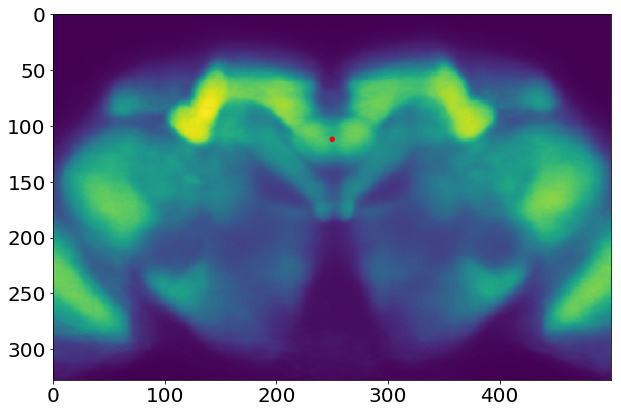

In [14]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(meanbrain.numpy()[:,:,145].T)
circle = plt.Circle((250, 112), 2, color='r')
ax.add_artist(circle)

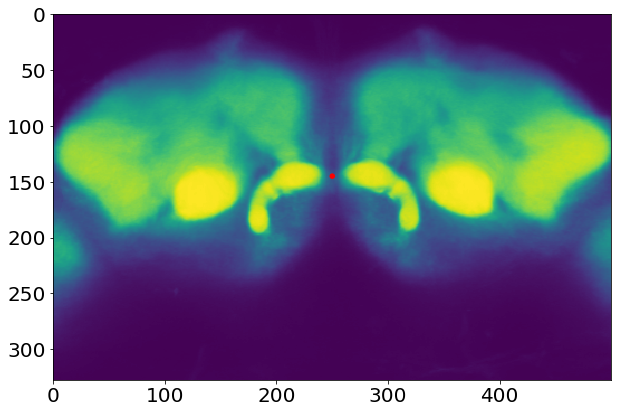

In [17]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(meanbrain.numpy()[:,:,90].T)
circle = plt.Circle((250, 145), 2, color='r')
ax.add_artist(circle)

# Load warped anatomies

In [18]:
folder = os.path.join(root_directory, '20191204_anatomy_collection', 'warp2mean2')
brains = [os.path.join(folder,x) for x in os.listdir(folder)]
bbb.sort_nicely(brains)
brains = brains[::-1]
anatomy = {}

for brain in brains:
    anatomy[os.path.split(brain)[-1]] = bbb.load_numpy_brain(brain)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.37 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.36 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.28 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.35 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.36 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.41 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.37 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.40 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.41 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.44 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.40 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.19 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.31 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.33 sec

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1.47 sec

~~ load_n

In [19]:
for i, anat in enumerate(anatomy):
        print(i,anat)

0 f72a0m_warped.nii.gz
1 f72a0_warped.nii.gz
2 f71a0m_warped.nii.gz
3 f71a0_warped.nii.gz
4 f70a0m_warped.nii.gz
5 f70a0_warped.nii.gz
6 f69a0m_warped.nii.gz
7 f69a0_warped.nii.gz
8 f68a1m_warped.nii.gz
9 f68a1_warped.nii.gz
10 f68a0m_warped.nii.gz
11 f68a0_warped.nii.gz
12 f67a0m_warped.nii.gz
13 f67a0_warped.nii.gz
14 f66a0m_warped.nii.gz
15 f66a0_warped.nii.gz
16 f65a0m_warped.nii.gz
17 f65a0_warped.nii.gz
18 f63a1m_warped.nii.gz
19 f63a1_warped.nii.gz
20 f63a0m_warped.nii.gz
21 f63a0_warped.nii.gz
22 f61a0m_warped.nii.gz
23 f61a0_warped.nii.gz
24 f60a0m_warped.nii.gz
25 f60a0_warped.nii.gz
26 f59a0m_warped.nii.gz
27 f59a0_warped.nii.gz
28 f58a0m_warped.nii.gz
29 f58a0_warped.nii.gz
30 f57a1m_warped.nii.gz
31 f57a1_warped.nii.gz
32 f57a0m_warped.nii.gz
33 f57a0_warped.nii.gz
34 f56a2m_warped.nii.gz
35 f56a2_warped.nii.gz
36 f56a1m_warped.nii.gz
37 f56a1_warped.nii.gz
38 f56a0m_warped.nii.gz
39 f56a0_warped.nii.gz
40 f54a0m_warped.nii.gz
41 f54a0_warped.nii.gz
42 f53a0m_warped.nii.gz

In [20]:
anats = []
for i, anat in enumerate(anatomy):
    anats.append(anat)

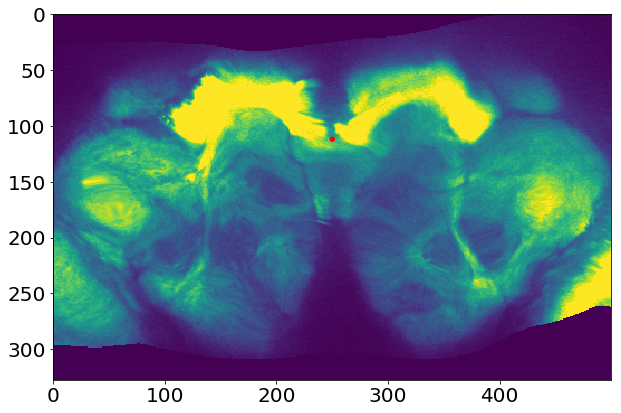

In [281]:
i=94
plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow((anatomy[anats[i]]/np.mean(anatomy[anats[i]]))[:,:,145].T,vmin=0,vmax=6)
circle = plt.Circle((250, 112), 2, color='r')
ax.add_artist(circle)

In [283]:
CX_bad = [0,1,2,3,4,5,6,7,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,62,63,64,65,
          70,71,86,87,92,93,96,97,98,99,100,101,74,75,78,79,80,81,82,83,84,85]

In [284]:
PB_bad = [0,1,40,41,44,45,46,47,48,49,56,57,58,
          59,62,63,68,69,74,75,76,77,80,81,86,
          87,90,91,92,93,94,95,96,97,98,99,100,101,
          102,103,104,105]

In [205]:
PB_good_old = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,
        22,24,25,26,27,29,30,31,32,33,34,35,36,37,39,41,42,44,45,49,51]

In [206]:
CX_good_old = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,
      19,21,23,24,25,29,30,33,34,35,36,38,40,41,42,44,45,47,51]

In [296]:
bad = list(set(CX_bad)|set(PB_bad))

In [309]:
good = [i for i in list(range(106)) if i not in bad]

In [311]:
len(good)

40

In [312]:
to_mean = []
for i in good:
    print(i)
    to_mean.append(anatomy[anats[i]]/np.mean(anatomy[anats[i]]))

8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
60
61
66
67
72
73
88
89


In [313]:
len(to_mean)

40

In [314]:
for i in range(40):
    print(i, np.mean(to_mean[i]))

0 1.000000000000001
1 1.0000000000000036
2 1.0000000000000016
3 0.9999999999999992
4 0.9999999999999983
5 0.9999999999999971
6 1.0000000000000002
7 1.0
8 0.9999999999999988
9 1.0000000000000018
10 1.0000000000000042
11 0.9999999999999983
12 0.9999999999999997
13 0.9999999999999968
14 1.000000000000001
15 0.9999999999999978
16 0.9999999999999988
17 1.0000000000000024
18 0.9999999999999954
19 0.9999999999999983
20 1.0000000000000016
21 0.9999999999999983
22 1.0000000000000024
23 1.0000000000000067
24 0.9999999999999991
25 1.000000000000003
26 0.9999999999999997
27 1.000000000000002
28 1.000000000000001
29 1.0000000000000033
30 0.9999999999999998
31 1.0000000000000038
32 0.9999999999999989
33 1.0
34 1.0000000000000027
35 0.9999999999999974
36 1.0000000000000024
37 1.0000000000000002
38 1.0000000000000042
39 0.9999999999999943


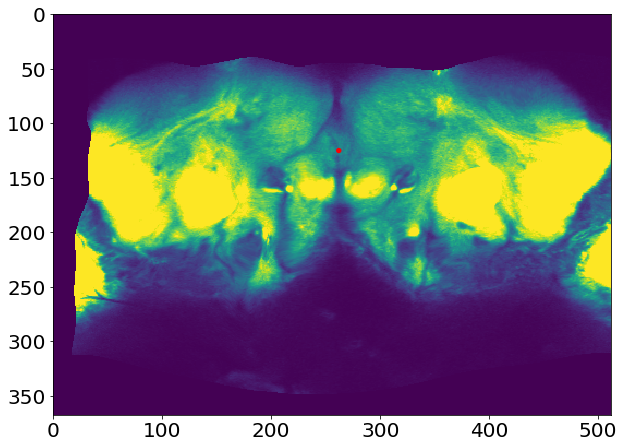

In [307]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(to_mean[30][:,:,100].T,vmin=0,vmax=8)
circle = plt.Circle((262, 125), 2, color='r')
ax.add_artist(circle)

In [ ]:
remove = [1,7,8,11]

In [316]:
len(good[:-2])

29

In [315]:
to_mean_array = np.asarray(to_mean)

In [316]:
np.shape(to_mean_array)

(40, 500, 328, 251)

In [317]:
meanbrain_new = np.mean(to_mean_array,axis=0)

In [318]:
# Reset spacing
meanbrain_new = ants.from_numpy(meanbrain_new)
anatomy_xml = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.xml')
meanbrain_new.set_spacing(bbb.get_resolution(anatomy_xml))

In [319]:
meanbrain_new

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (500, 328, 251)
	 Spacing    : (0.768, 0.768, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [320]:
save_file = os.path.join(root_directory, '20191204_anatomy_collection', 'meanbrain20191208.nii')
ants.image_write(meanbrain_new, save_file)

In [353]:
meanbrain_new.shape

(512, 368, 251)

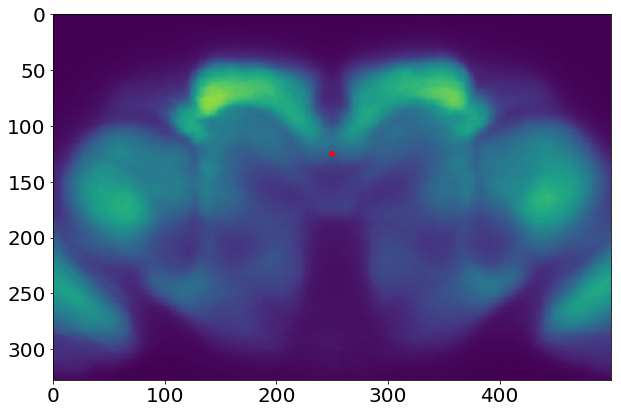

In [383]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(meanbrain_new[12:,10:-30,160].T,vmin=0,vmax=8)
circle = plt.Circle((250, 125), 2, color='r')
ax.add_artist(circle)

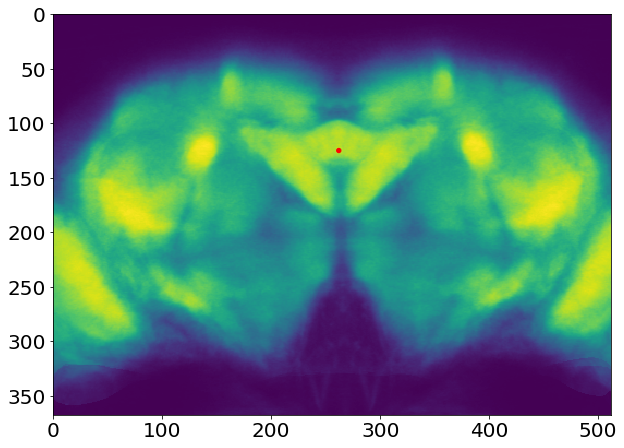

In [340]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(meanbrain.numpy()[:,:,130].T)
circle = plt.Circle((262, 125), 2, color='r')
ax.add_artist(circle)

In [131]:
good = [3,10,11,5,6,30,31]
# not sure about 11

In [139]:
#good_brains = []
for i in good:
    good_brains.append(anatomy[anats[i]])

In [140]:
np.shape(good_brains)

(14, 512, 368, 251)

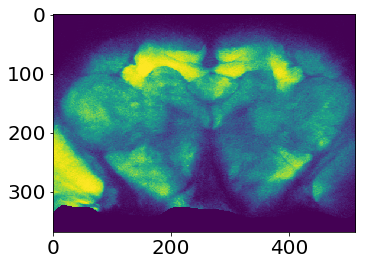

In [154]:
plt.imshow(good_brains[7][:,:,150].T)